# Richter's Predictor Modeling Earthquake Damage
Data - https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data
data = pd.read_csv("train_values.csv")
labels = pd.read_csv("train_labels.csv")

In [3]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [33]:
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [34]:
# Merging data with labels with based on 'building_id'
data = pd.merge(data,labels,on='building_id')

In [36]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [37]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[data.select_dtypes('object').columns] = data.select_dtypes('object').apply(le.fit_transform)

In [38]:
# Splitting predictor and target variables from the data
X = data.drop(['damage_grade','building_id'],axis=1)
y = data['damage_grade']

In [39]:
X.shape

(260601, 38)

In [40]:
# Normalizing data
from sklearn.preprocessing import Normalizer,StandardScaler
normalizer = Normalizer()
scaler = StandardScaler()
X = normalizer.fit_transform(X)
X = scaler.fit_transform(X)

In [41]:
y=pd.get_dummies(y,)

In [42]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Creating model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(38,)))
model.add(Dropout(0.4))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='sigmoid'))
optimizer = SGD(learning_rate=0.01)

In [57]:
# Compiling model
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
history = model.fit(X_train,y_train,batch_size=200,epochs=50,validation_data=(X_test,y_test),workers=8,use_multiprocessing=True)

Train on 182420 samples, validate on 78181 samples
Epoch 1/50
182420/182420 [==============================] - 2s 11us/step - loss: 0.8181 - accuracy: 0.5727 - val_loss: 0.8055 - val_accuracy: 0.5717
Epoch 2/50
182420/182420 [==============================] - 2s 11us/step - loss: 0.8171 - accuracy: 0.5738 - val_loss: 0.8045 - val_accuracy: 0.5734
Epoch 3/50
182420/182420 [==============================] - 2s 11us/step - loss: 0.8165 - accuracy: 0.5755 - val_loss: 0.8029 - val_accuracy: 0.5752
Epoch 4/50
182420/182420 [==============================] - 2s 11us/step - loss: 0.8150 - accuracy: 0.5755 - val_loss: 0.8007 - val_accuracy: 0.5769
Epoch 5/50
182420/182420 [==============================] - 2s 11us/step - loss: 0.8135 - accuracy: 0.5771 - val_loss: 0.7990 - val_accuracy: 0.5856
Epoch 6/50
182420/182420 [==============================] - 2s 11us/step - loss: 0.8126 - accuracy: 0.5780 - val_loss: 0.7975 - val_accuracy: 0.5802
Epoch 7/50
182420/182420 [=============================

KeyboardInterrupt: 

In [46]:
model.evaluate(X_test,y_test)

78181/78181 [==============================] - 2s 25us/step


[0.8524900651155268, 0.5685396790504456]

Text(0.5, 1.0, 'Accuracy Curve')

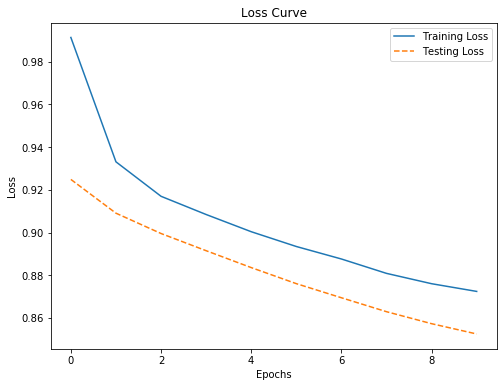

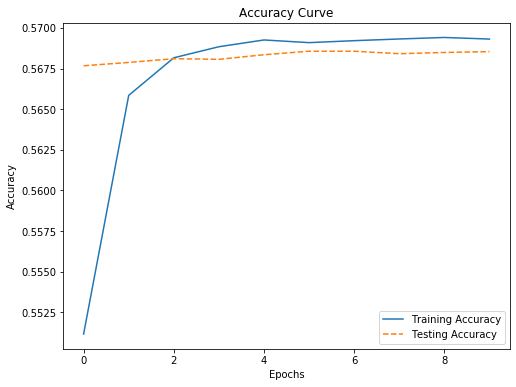

In [55]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")